In [1]:
import sys
sys.path.append('../')

In [2]:
import sklearn as sk
from sklearn.datasets import load_breast_cancer

import pandas as pd

import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

from icecream import ic

from radiousAngleMethod import radiousAngleMethod
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import time

In [3]:
def train_and_evaluate_models(x, y, data_name):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    models = {
        # 'SVM': SVC(),
        # 'Random Forest': RandomForestClassifier(),
        'KNN': KNeighborsClassifier()
    }
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'{data_name}, '
                  f'acc.: {model.score(X_test, y_test):.2f}, '
                  f'prec.: {sk.metrics.precision_score(y_test, y_pred):.2f}, '
                  f'rec.: {sk.metrics.recall_score(y_test, y_pred):.2f}, '
                  f'f1: {sk.metrics.f1_score(y_test, y_pred):.2f}')
        plt.show()

In [4]:
iris = sk.datasets.load_iris()
wine = sk.datasets.load_wine()
cancer = sk.datasets.load_breast_cancer()

In [5]:
pd.DataFrame(iris.data)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
pd.DataFrame(wine.data)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [7]:
pd.DataFrame(cancer.data)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
pca = sk.decomposition.PCA(n_components=2)

In [9]:
pca.fit(iris.data)
iris_pca = pca.transform(iris.data)
pd.DataFrame(iris_pca)[:3]

,0,1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949


In [10]:
pca.fit(wine.data)
wine_pca = pca.transform(wine.data)
pd.DataFrame(wine_pca)[:3]

,0,1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309


In [11]:
pca.fit(cancer.data)
cancer_pca = pca.transform(cancer.data)
pd.DataFrame(cancer_pca)[:3]

,0,1
0,1160.142574,-293.917544
1,1269.122443,15.630182
2,995.793889,39.156743


In [12]:
standard_scaler = sk.preprocessing.StandardScaler()

iris_standard = standard_scaler.fit_transform(iris_pca)
wine_standard = standard_scaler.fit_transform(wine_pca)
cancer_standard = standard_scaler.fit_transform(cancer_pca)

In [13]:
ic(pd.DataFrame(iris_standard)[:3])
ic(len(iris_standard))

ic| pd.DataFrame(iris_standard)[:3]:           0         1
                                     0 -1.309711  0.650541
                                     1 -1.324357 -0.360512
                                     2 -1.409674 -0.295230
ic| len(iris_standard): 150


150

In [14]:
ic(pd.DataFrame(wine_standard)[:3])
ic(len(wine_standard))

ic| pd.DataFrame(wine_standard)[:3]:           0         1
                                     0  1.014282  1.640831
                                     1  0.965041 -0.409573
                                     2  1.394756 -0.499095
ic| len(wine_standard): 178


178

In [15]:
ic(pd.DataFrame(cancer_standard)[:3])
ic(len(cancer_standard))

ic| pd.DataFrame(cancer_standard)[:3]:           0         1
                                       0  1.743043 -3.440692
                                       1  1.906779  0.182972
                                       2  1.496120  0.458381
ic| len(cancer_standard): 569


569

<Axes: >

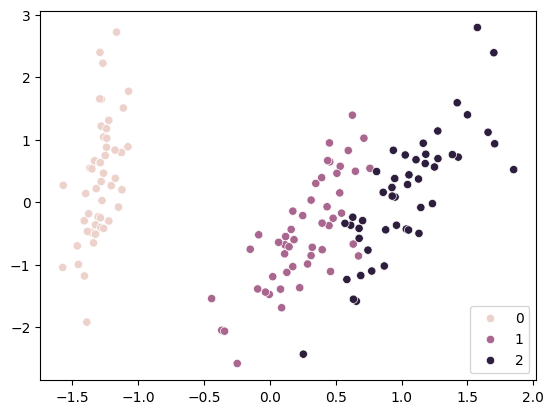

In [16]:
sns.scatterplot(x=iris_standard[:, 0], y=iris_standard[:, 1], hue=iris.target)

<Axes: >

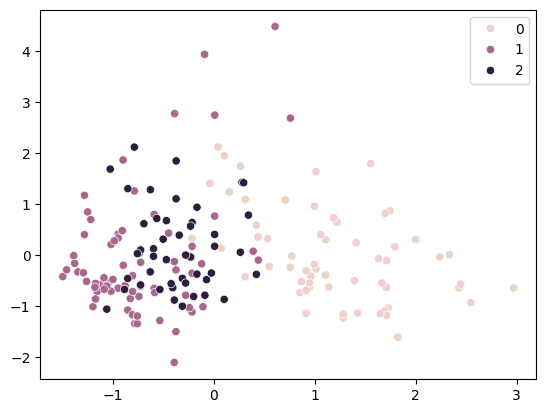

In [17]:
sns.scatterplot(x=wine_standard[:, 0], y=wine_standard[:, 1], hue=wine.target)

<Axes: >

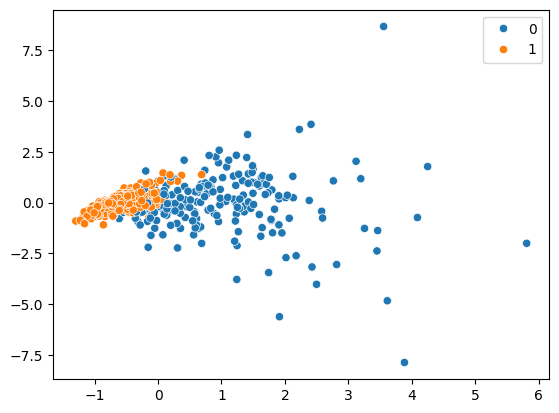

In [18]:
sns.scatterplot(x=cancer_standard[:, 0], y=cancer_standard[:, 1], hue=cancer.target)

In [19]:
cancer_data_default = load_breast_cancer()
cancer_data = pca.fit_transform(cancer_data_default.data)
cancer_data = standard_scaler.fit_transform(cancer_data)

569
781


<Axes: >

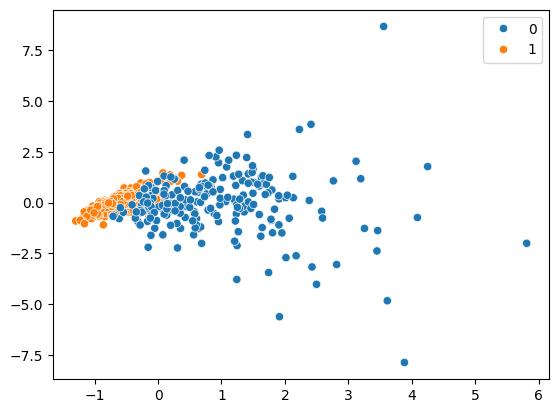

In [20]:
#RAM
ram_data = cancer_data.copy()

print(len(ram_data))
start = time.time()

cancer_RAM_x, cancer_RAM_y = radiousAngleMethod(ram_data, cancer_data_default.target, 7)

end = time.time()

timeRAM = end - start

print(len(cancer_RAM_x))

sns.scatterplot(x=cancer_RAM_x[:, 0], y=cancer_RAM_x[:, 1], hue=cancer_RAM_y)

In [21]:
cancer_RAM_x_rounded = np.around(cancer_RAM_x, 10)
ram_data_rounded = np.around(ram_data, 10)

result = np.setdiff1d(cancer_RAM_x_rounded, ram_data_rounded)
print(len(result))

0


<Axes: >

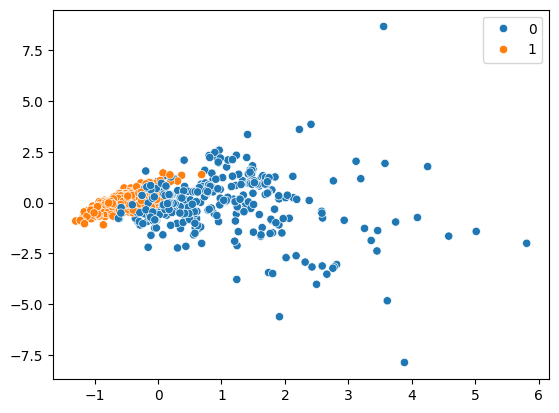

In [22]:
#SMOTE
from imblearn.over_sampling import SMOTE

smote_data = cancer_data.copy()

start = time.time()

cancer_SMOTE_x, cancer_SMOTE_y = SMOTE().fit_resample(smote_data, cancer_data_default.target)

end = time.time()

timeSMOTE = end - start

sns.scatterplot(x=cancer_SMOTE_x[:, 0], y=cancer_SMOTE_x[:, 1], hue=cancer_SMOTE_y)


<Axes: >

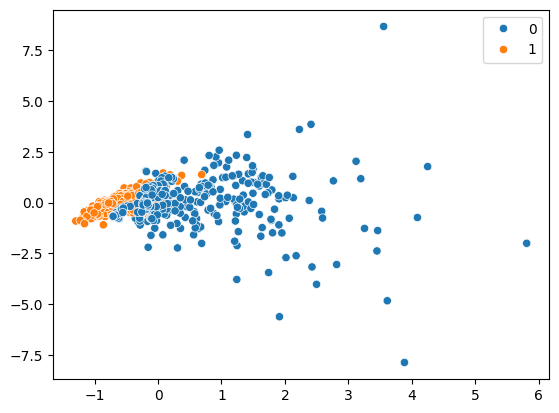

In [23]:
#ADASYN
from imblearn.over_sampling import ADASYN

adasyn_data = cancer_data.copy()

start = time.time()

cancer_ADASYN_x, cancer_ADASYN_y = ADASYN().fit_resample(adasyn_data, cancer_data_default.target)

end = time.time()

timeADASYN = end - start

sns.scatterplot(x=cancer_ADASYN_x[:, 0], y=cancer_ADASYN_x[:, 1], hue=cancer_ADASYN_y)


<Axes: >

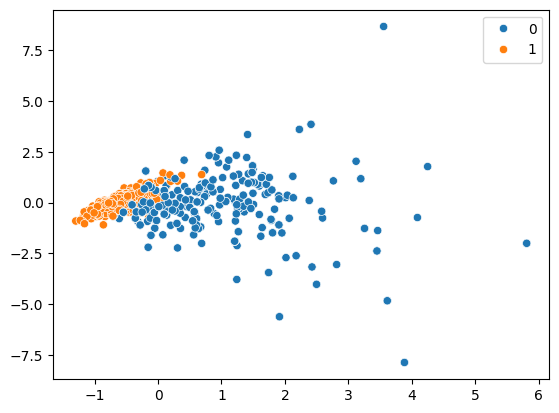

In [24]:
#random oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
ros_data = cancer_data.copy()

start = time.time()

cancer_ROS_x, cancer_ROS_y = ros.fit_resample(ros_data, cancer_data_default.target)

end = time.time()

timeROS = end - start

sns.scatterplot(x=cancer_ROS_x[:, 0], y=cancer_ROS_x[:, 1], hue=cancer_ROS_y)

In [25]:
ic(sp.stats.shapiro(cancer_RAM_x[:, 0]))
ic(sp.stats.shapiro(cancer_SMOTE_x[:, 0]))
ic(sp.stats.shapiro(cancer_ADASYN_x[:, 0]))
ic(sp.stats.shapiro(cancer_ROS_x[:, 0]))

ic| sp.stats.shapiro(cancer_RAM_x[:, 0]): ShapiroResult(statistic=np.float64(0.8893380842675185), pvalue=np.float64(3.259085940573945e-23))
ic| sp.stats.shapiro(cancer_SMOTE_x[:, 0]): ShapiroResult(statistic=np.float64(0.8781478352426927), pvalue=np.float64(3.298640208996482e-23))
ic| sp.stats.shapiro(cancer_ADASYN_x[:, 0]): ShapiroResult(statistic=np.float64(0.8248031632451698), pvalue=np.float64(4.195439698139043e-27))
ic| sp.stats.shapiro(cancer_ROS_x[:, 0]): ShapiroResult(statistic=np.float64(0.8732588075229768), pvalue=np.float64(1.262214675534701e-23))


ShapiroResult(statistic=np.float64(0.8732588075229768), pvalue=np.float64(1.262214675534701e-23))

In [26]:
ic(sp.stats.ttest_ind(cancer_RAM_x[:, 0], cancer_data[:, 0], equal_var=False))
ic(sp.stats.ttest_ind(cancer_SMOTE_x[:, 0], cancer_data[:, 0], equal_var=False))
ic(sp.stats.ttest_ind(cancer_ADASYN_x[:, 0], cancer_data[:, 0], equal_var=False))
ic(sp.stats.ttest_ind(cancer_ROS_x[:, 0], cancer_data[:, 0], equal_var=False))

ic| sp.stats.ttest_ind(cancer_RAM_x[:, 0], cancer_data[:, 0], equal_var=False): TtestResult(statistic=np.float64(4.495896785318648), pvalue=np.float64(7.554079587778853e-06), df=np.float64(1281.6188159589883))
ic| sp.stats.ttest_ind(cancer_SMOTE_x[:, 0], cancer_data[:, 0], equal_var=False): TtestResult(statistic=np.float64(3.1568090108454347), pvalue=np.float64(0.0016333104010053795), df=np.float64(1245.8291689826804))
ic| sp.stats.ttest_ind(cancer_ADASYN_x[:, 0], cancer_data[:, 0], equal_var=False): TtestResult(statistic=np.float64(-0.4711513693154889), pvalue=np.float64(0.6376212208032788), df=np.float64(1160.1788006931445))
ic| sp.stats.ttest_ind(cancer_ROS_x[:, 0], cancer_data[:, 0], equal_var=False): TtestResult(statistic=np.float64(3.200636217488814), pvalue=np.float64(0.0014057256301524624), df=np.float64(1250.6133806132173))


TtestResult(statistic=np.float64(3.200636217488814), pvalue=np.float64(0.0014057256301524624), df=np.float64(1250.6133806132173))

In [27]:
ic(sp.stats.pearsonr(cancer_RAM_x[:, 0], cancer_RAM_x[:, 1]))
ic(sp.stats.pearsonr(cancer_SMOTE_x[:, 0], cancer_SMOTE_x[:, 1]))
ic(sp.stats.pearsonr(cancer_ADASYN_x[:, 0], cancer_ADASYN_x[:, 1]))
ic(sp.stats.pearsonr(cancer_ROS_x[:, 0], cancer_ROS_x[:, 1]))

ic| sp.stats.pearsonr(cancer_RAM_x[:, 0], cancer_RAM_x[:, 1]): PearsonRResult(statistic=np.float64(-0.02931174774659604), pvalue=np.float64(0.4133452581893611))
ic| sp.stats.pearsonr(cancer_SMOTE_x[:, 0], cancer_SMOTE_x[:, 1]): PearsonRResult(statistic=np.float64(-0.03528290186009266), pvalue=np.float64(0.34648563800610027))
ic| sp.stats.pearsonr(cancer_ADASYN_x[:, 0], cancer_ADASYN_x[:, 1]): PearsonRResult(statistic=np.float64(0.024969629058564497), pvalue=np.float64(0.5071204648265788))
ic| sp.stats.pearsonr(cancer_ROS_x[:, 0], cancer_ROS_x[:, 1]): PearsonRResult(statistic=np.float64(-0.10092716053624637), pvalue=np.float64(0.0069543641153062994))


PearsonRResult(statistic=np.float64(-0.10092716053624637), pvalue=np.float64(0.0069543641153062994))

In [28]:
ic(timeRAM)
ic(timeSMOTE)
ic(timeADASYN)
ic(timeROS)

ic| timeRAM: 0.0010030269622802734
ic| timeSMOTE: 0.0010046958923339844
ic| timeADASYN: 0.0040225982666015625
ic| timeROS: 0.0


0.0

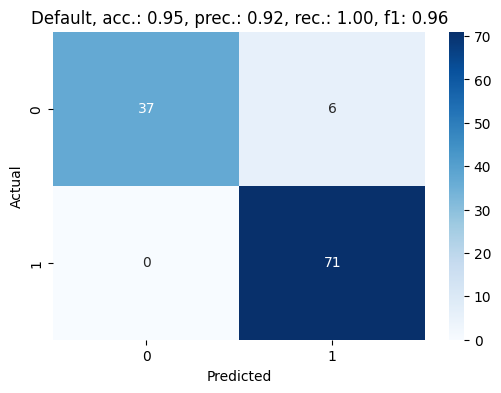

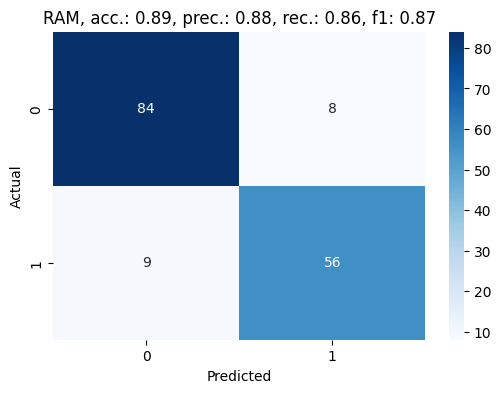

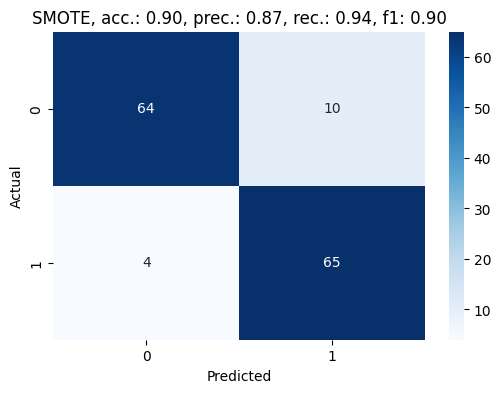

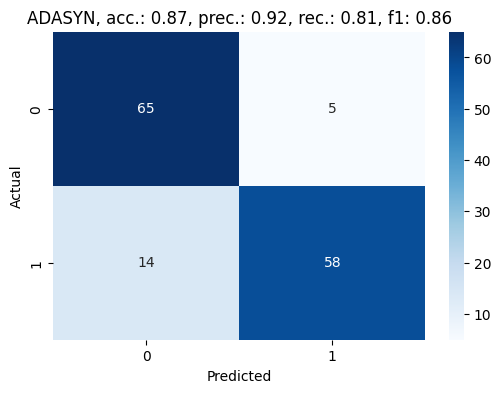

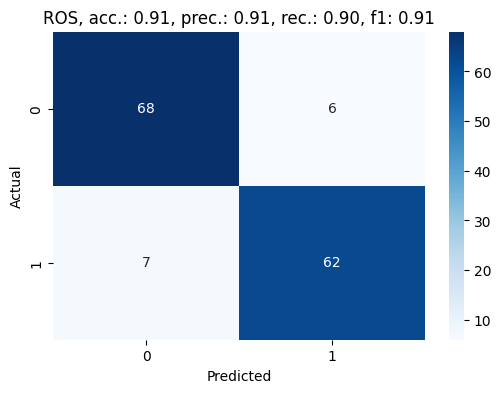

In [29]:
train_and_evaluate_models(cancer_standard, cancer_data_default.target, 'Default')
train_and_evaluate_models(cancer_RAM_x, cancer_RAM_y, 'RAM')
train_and_evaluate_models(cancer_SMOTE_x, cancer_SMOTE_y, 'SMOTE')
train_and_evaluate_models(cancer_ADASYN_x, cancer_ADASYN_y, 'ADASYN')
train_and_evaluate_models(cancer_ROS_x, cancer_ROS_y, 'ROS')

In [30]:
# #RAM
# df = pd.DataFrame(cancer_data, columns=[f'PC{i+1}' for i in range(cancer_data.shape[1])])

# # Dodanie kolumny 'target', która zawiera etykiety (0: złośliwy, 1: niezłośliwy)
# df['target'] = cancer_data_default.target

# df_malignant = df[df['target'] == 0]
# df_benign = df[df['target'] == 1]

# df_benign = df_benign.to_numpy()
# df_malignant = df_malignant.to_numpy()

# start = time.time()

# ic(len(df_benign))
# ic(len(df_malignant))

# if len(df_benign) < len(df_malignant):
#     cancer_standard_benign_radiousAngleMethod = radiousAngleMethod(df_benign, 7, abs(len(df_benign) - len(df_malignant)))
#     cancer_standard_malignant_radiousAngleMethod = df_malignant
# else:
#     cancer_standard_benign_radiousAngleMethod = df_benign
#     cancer_standard_malignant_radiousAngleMethod = radiousAngleMethod(df_malignant, 7, abs(len(df_benign) - len(df_malignant)))

# end = time.time()

# timeRAM = end - start

# if isinstance(cancer_standard_benign_radiousAngleMethod, list):
#     cancer_standard_benign_radiousAngleMethod = np.array(cancer_standard_benign_radiousAngleMethod)

# if isinstance(cancer_standard_malignant_radiousAngleMethod, list):
#     cancer_standard_malignant_radiousAngleMethod = np.array(cancer_standard_malignant_radiousAngleMethod)

# cancer_standard_benign_radiousAngleMethod = pd.DataFrame(cancer_standard_benign_radiousAngleMethod, columns=[f'PC{i+1}' for i in range(cancer_standard_benign_radiousAngleMethod.shape[1])])
# cancer_standard_benign_radiousAngleMethod['target'] = 1

# cancer_standard_malignant_radiousAngleMethod = pd.DataFrame(cancer_standard_malignant_radiousAngleMethod, columns=[f'PC{i+1}' for i in range(cancer_standard_malignant_radiousAngleMethod.shape[1])])
# cancer_standard_malignant_radiousAngleMethod['target'] = 0

# cancer_RAM = pd.concat([cancer_standard_benign_radiousAngleMethod, cancer_standard_malignant_radiousAngleMethod], ignore_index=True)

# sns.scatterplot(x=cancer_RAM['PC1'], y=cancer_RAM['PC2'], hue=cancer_RAM['target'])